
# 1D Diffusion

Solves by FDM 

$$ \frac{ \partial^2 u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2} $$

diffusion coefficient $\nu = 0.3$

Initial Condition
$$ u_0(x)=   \left\{
\begin{array}{ll}
      1 & 0 \leq x<0.5 \\
      2 & 0.5 \leq x \leq 1 \\
      1 & 1 < x \leq 2
\end{array} 
\right.  $$

Boundary Conditions: $$u(0,t) = 1 \\ u(2, t) = 1$$


Text(0, 0.5, 'u')

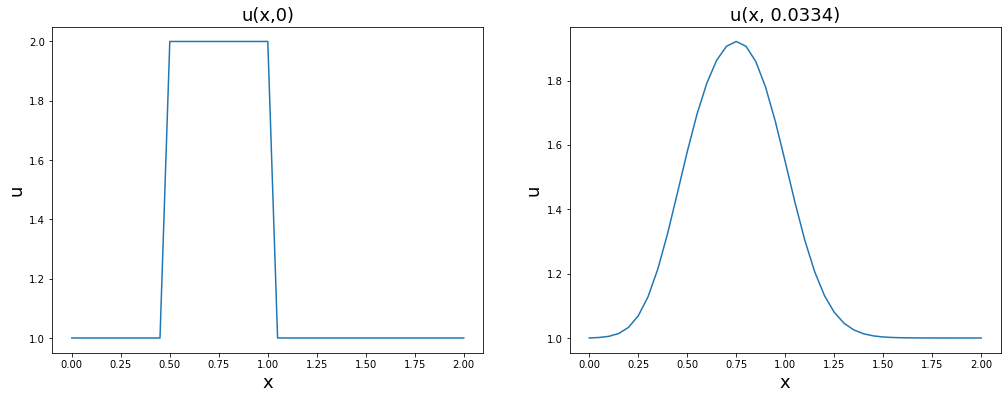

In [48]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x_start, x_end = 0, 2  # domain boundaries
nodes_x = 41  # number of spatial nodes
steps_t = 20  # number of time steps
dx = (x_end - x_start)/(nodes_x -1)       # spatial resolution
x  = np.linspace(x_start, x_end, nodes_x) # spatial grid
dt = 1.67e-3  # time step size
nu = 0.3      # diffusion coefficient
alpha = nu * dt / dx**2  # definition for convenience

# initial condition
u0 = np.ones(nodes_x)
u0[int(0.5/dx):int(1/dx + 1)] = 2.0

u1 = u0                # solution at time step  n
u2 = np.ones(nodes_x)  # solution at time step n+1

for n in range(steps_t):
    for i in range(1, nodes_x - 1):
        # solve FD equation for time step n+1
        u2[i] = u1[i] + alpha * (u1[i+1] - 2*u1[i] + u1[i-1])
    
    # update for next time step
    u1 = u2
    
# plot results
fig, ax = plt.subplots(1, 2, figsize=[17, 6])
ax[0].plot(x, u0)
ax[0].set_title("u(x,0)", fontsize=18)
ax[0].set_xlabel("x", fontsize=18)
ax[0].set_ylabel("u", fontsize=18)

ax[1].plot(x, u1)
ax[1].set_title("u(x, {})".format(dt*steps_t), fontsize=18)
ax[1].set_xlabel("x", fontsize=18)
ax[1].set_ylabel("u", fontsize=18)


